<a href="https://colab.research.google.com/github/LeonardoGoncRibeiro/03_StatisticsUsingPython/blob/main/01_FrequencyMetrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics using Python: Frequency and Measures

In this course, we will start our study in statistics using Python. Thus, this will be a gentle introduction on how to use the programming language to find relevant statistical conclusions. We will see different central tendency measures (mean, median and mode), see which metrics can be used to measure deviation, understand about the different types of data, and understand what is a frequency distribution.

For that end, we will perform the descriptive analysis of a set of data using Python. We will make our analyses over a dataset from PNAD 2015:

In [2]:
import pandas as pd
dataset = pd.read_csv('dados.csv') 

In [3]:
dataset.head( )

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In this dataset, we have information regarding:

*   State from Brazil (UF)
*   Sex (Sexo)
*   Age (Idade)
*   Color (Cor)
*   Years of study (Anos de estudo)
*   Monthly income (Renda)
*   Height (Altura)

For some of these, our data is encoded. The code can be seen in the following:


**State from Brazil:**

In [4]:
map_state = {11: "Rondônia",
             12: "Acre",
             13: "Amazonas",
             14: "Roraima",
             15: "Pará",
             16: "Amapá",
             17: "Tocantins",
             21: "Maranhão",
             22: "Piauí",
             23: "Ceará",
             24: "Rio Grande do Norte",
             25: "Paraíba",
             26: "Pernambuco",
             27: "Alagoas",
             28: "Sergipe",
             29: "Bahia",
             31: "Minas Gerais",
             32: "Espírito Santo",
             33: "Rio de Janeiro",
             35: "São Paulo",
             41: "Paraná",
             42: "Santa Catarina",
             43: "Rio Grande do Sul",
             50: "Mato Grosso do Sul",
             51: "Mato Grosso",
             52: "Goiás",
             53: "Distrito Federal"}

**Sex:**

In [5]:
map_sex = {0: "M",
           1: "F"}

**Years of study:**

In [6]:
map_years_study = {1 : "0 years",
                   2 : "1 year",
                   3 : "2 years",
                   4 : "3 years",
                   5 : "4 years",
                   6 : "5 years",
                   7 : "6 years",
                   8 : "7 years",
                   9 : "8 years",
                   10: "9 years",
                   11: "10 years",
                   12: "11 years",
                   13: "12 years",
                   14: "13 years",
                   15: "14 years",
                   16: "15 years",
                   17: "Not found",
                   18: "Not aplicable"}

**Color:**

In [7]:
map_color = {0: "Indigenous",
             2: "White",
             4: "Black",
             6: "Yellow",
             8: "Pardo",
             9: "Not declared"}

This dataset can be found from IBGE website. However, some data treatment was performed before:


*   Invalid entries for monthly income were eliminated (999 999 999 999).
*   Missing entries for monthly income were eliminated.
*   We considered only data from a person of reference in each house.


## Type of data

Now, let's understand our data types. In statistics, we can define our data as quantitative or qualitative. Quantitative data express a quantity, while qualitative data express a quality of our entry. 

For instance, monthly income express how much money a family makes per month (quantitative). However, state from Brazil expresses where the family lives (qualitative). 

Qualitative data can be:

1.   Ordinal: When data can be ordered. In our data set, for instance, years of study is an ordinal qualitative feature.
2.   Nominal: When the feature simply serves as a label, and can not really be ordered beforehand.



Quantitative data can be:

1.   Discrete: When it is finitely countable. For instance, in our data set, age as an example of discrete data.
2.   Continuous: When it is technically infinite. For instance, in our dataset, height is a continuous variable.



In [8]:
dataset.head(5)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


# Frequency distribution

To understand how a variable is distributed, we can check its frequency distribution. A good way of visualizing the frequency distribution of a sampled feature is the histogram. We will see how to use histograms for different types of variables:

## Qualitative data

For qualitative data, we usually draw histograms based on the number of entries. For instance, considering the sex feature:

In [9]:
dataset['Sexo'].value_counts( )

0    53250
1    23590
Name: Sexo, dtype: int64

We can see that 53250 entries have Sex = 0 (man) and 23590 entries have Sex = 1 (woman). To see this in percentual terms, we can do:

In [10]:
dataset['Sexo'].value_counts(normalize = True)*100

0    69.299844
1    30.700156
Name: Sexo, dtype: float64

To improve visualization of our data, we can put it in a different dataframe:

In [11]:
frequency = dataset['Sexo'].value_counts( )
frequency_perc = round(dataset['Sexo'].value_counts(normalize = True)*100, 2)

In [12]:
dist_freq_qual = pd.DataFrame({"Frequency": frequency, "Percentage (%)": frequency_perc})

In [13]:
dist_freq_qual.head()

,Frequency,Percentage (%)
0,53250,69.3
1,23590,30.7


See that, in our new table, values are referenced by the coded values (0 - M, 1 - F). Let's rename the indexes:

In [14]:
dist_freq_qual.rename(index = map_sex, inplace = True)

dist_freq_qual.head( )

,Frequency,Percentage (%)
M,53250,69.3
F,23590,30.7


Let's see another example. Now, let's create a table of frequencies considering two features: sex and color.

In [15]:
freq = pd.crosstab(dataset.Sexo, dataset.Cor)
freq

Cor,0,2,4,6,8
Sexo,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


Great! Now, let's decode our features:

In [16]:
freq.rename(index = map_sex, inplace = True)
freq.rename(columns = map_color, inplace = True)
freq

Cor,Indigenous,White,Black,Yellow,Pardo
Sexo,,,,,
M,256,22194,5502,235,25063
F,101,9621,2889,117,10862


If we want to get the relative frequency:

In [17]:
freq_rel = pd.crosstab(dataset.Sexo, dataset.Cor, normalize = True)

freq_rel.rename(index = map_sex, inplace = True)
freq_rel.rename(columns = map_color, inplace = True)
freq_rel

Cor,Indigenous,White,Black,Yellow,Pardo
Sexo,,,,,
M,0.003332,0.288834,0.071603,0.003058,0.326171
F,0.001314,0.125208,0.037598,0.001523,0.141359


An interesting thing we can do with crosstab is to use a different aggregation function (not count values). Let's see, for instance, the average monthly income for each of our classes:

In [18]:
avg_income = pd.crosstab(dataset.Sexo, dataset.Cor, aggfunc = 'mean', values = dataset.Renda)

avg_income.rename(index = map_sex, inplace = True)
avg_income.rename(columns = map_color, inplace = True)
avg_income

Cor,Indigenous,White,Black,Yellow,Pardo
Sexo,,,,,
M,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
F,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


We can also do this using multiple aggregation functions:

In [78]:
avg_income = pd.crosstab(dataset['Anos de Estudo'], dataset.Sexo, aggfunc = {'mean', 'median', 'max'}, values = dataset.Renda)

avg_income.rename(index = map_years_study, inplace = True)
avg_income.rename(columns = map_sex, inplace = True)
avg_income

max                   mean               median        
Sexo                   M         F            M            F       M       F
Anos de Estudo                                                              
0 years          30000.0   10000.0   799.494638   516.201748   700.0   390.0
1 year           30000.0    2000.0   895.629047   492.771987   788.0   400.0
2 years          40000.0    4000.0   931.178986   529.911638   788.0   450.0
3 years          80000.0    3500.0  1109.203862   546.853916   800.0   500.0
4 years          50000.0   10000.0  1302.329283   704.279111  1000.0   788.0
5 years          35000.0    8000.0  1338.653218   781.389776  1045.0   788.0
6 years          25000.0    6000.0  1448.875419   833.732824  1200.0   788.0
7 years          40000.0    9000.0  1465.497940   830.751004  1200.0   788.0
8 years          30000.0   18000.0  1639.396667   933.615351  1300.0   800.0
9 years          60000.0   20000.0  1508.038850   868.021700  1200.0   788.0
10 years         45000.0    6000.0  1731.270847   925.919225  1218.0   800.0
11 years        200000.0  100000.0  2117.060504  1286.790889  1500.0  1000.0
12 years         30000.0  120000.0  2470.330776  1682.313725  1800.0  1200.0
13 years         25000.0   20000.0  3195.099154  1911.730047  2400.0  1300.0
14 years         50000.0   20000.0  3706.620269  2226.460457  2500.0  1600.0
15 years        200000.0  100000.0  6134.279790  3899.513231  4000.0  2800.0
Not found         7000.0    3000.0  1295.761905   798.174419  1200.0   788.0

## Quantitative data

For quantitative data, to count the number of instances, we first have to categorize our data. Considering the monthly income, we can categorize our data in different classes:

*   A: More than R\$ 15,760.00
*   B: Between R\$ 7,880.00 and R\$ 15,760.00
*   C: Between R\$ 3,152.00 and R\$ 7,880.00
*   D: Between R\$ 1,576.00 and R\$ 3,152.00
*   E: Less than R\$ 1,576.00



Categorization of quantitative data can be performed using the cut method. First, let's build our classes:

In [19]:
classes = [dataset.Renda.min(), 1576, 3152, 7880, 15760, dataset.Renda.max()]
label = ['E', 'D', 'C', 'B', 'A']
classes

[0, 1576, 3152, 7880, 15760, 200000]

Ok. Now, let's use cut:

In [20]:
pd.cut(x = dataset.Renda, bins = classes, labels = label, include_lowest = True)

0        E
1        E
2        E
3        C
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

Our cut function has categorized each of our dataframe entries into one of the five classes. Let's store this information in our dataset:

In [21]:
dataset['IncomeClasses'] = pd.cut(x = dataset.Renda, bins = classes, labels = label, include_lowest = True)
dataset.head( )

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,IncomeClasses
0,11,0,23,8,12,800,1.603808,E
1,11,1,23,2,12,1150,1.739790,E
2,11,1,35,8,15,880,1.760444,E
3,11,0,46,2,6,3500,1.783158,C
4,11,1,47,8,9,150,1.690631,E


Ok. Now, since we have categorized our data, we can now use *value_counts( )*:

In [22]:
dataset['IncomeClasses'].value_counts( )

E    49755
D    16700
C     7599
B     2178
A      608
Name: IncomeClasses, dtype: int64

Great! Now, let's improve our table:

In [23]:
freq = dataset['IncomeClasses'].value_counts( )
freq_rel = round(dataset['IncomeClasses'].value_counts(normalize = True)*100, 3)

dist_freq_quant = pd.DataFrame({"Freq" : freq, "Freq rel (%)" : freq_rel})

dist_freq_quant

,Freq,Freq rel (%)
E,49755,64.751
D,16700,21.733
C,7599,9.889
B,2178,2.834
A,608,0.791


Now, let's just order our data (alphabetical ordering):

In [24]:
dist_freq_quant.sort_index(ascending = False)

,Freq,Freq rel (%)
A,608,0.791
B,2178,2.834
C,7599,9.889
D,16700,21.733
E,49755,64.751


### Optimizing frequency distribution for quantitative data

To make our analysis more efficient, we can simply adopt that the number of classes for categorization follow the Sturges law:

$k = 1 + \frac{10}{3} \, \log_{10} n$

where $n$ is the number of observations and $k$ is the number of classes. Thus, we can do:

In [25]:
import numpy as np

n = dataset.shape[0]
k = 1 + 10/3*np.log10(n)
k

17.285291187298853

Note that $k$ is not an integer. Thus, we usually round this value:

In [26]:
k = int(round(k, 0))
k

17

Ok. Now, let's use cut again. However, this time, we will not create a new feature in our dataframe:

In [27]:
pd.value_counts(
    pd.cut(dataset.Renda,
           bins = k,
           include_lowest = True),
    sort = False
)

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: Renda, dtype: int64

Note that, here, we did not pass the bins, but rather the number of bins. Thus, we will get classes of equal amplitude.

Now, let's just improve the visualization of our table:

In [28]:
freq = pd.value_counts(
    pd.cut(dataset.Renda,
           bins = k,
           include_lowest = True),
    sort = False
)

freq_rel = round(pd.value_counts(
    pd.cut(dataset.Renda,
           bins = k,
           include_lowest = True),
    sort = False,
    normalize = True
)*100, 3)

pd.DataFrame({"freq" : freq, "freq_rel" : freq_rel})

,freq,freq_rel
"(-200.001, 11764.706]",75594,98.378
"(11764.706, 23529.412]",1022,1.330
"(23529.412, 35294.118]",169,0.220
"(35294.118, 47058.824]",19,0.025
"(47058.824, 58823.529]",16,0.021
"(58823.529, 70588.235]",5,0.007
"(70588.235, 82352.941]",4,0.005
"(82352.941, 94117.647]",1,0.001
"(94117.647, 105882.353]",6,0.008
"(105882.353, 117647.059]",0,0.000


Great! We managed to get the number of observations for each class. 

### Histogram

To visualize these results, we can use a histogram. For instance, using an histogram for the height:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Height (m)')

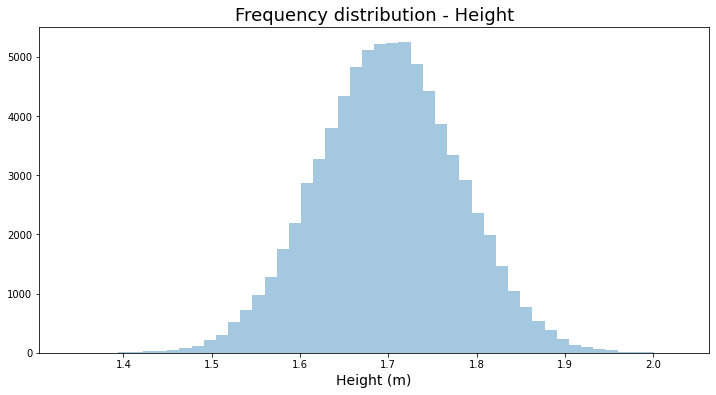

In [29]:
import seaborn as sns

ax = sns.distplot(dataset.Altura, kde = False)
ax.figure.set_size_inches(12, 6)
ax.set_title("Frequency distribution - Height", fontsize = 18)
ax.set_xlabel("Height (m)", fontsize = 14)

Great! 

Note that height is a quantitative feature. When we want to visualize the frequency distribution for qualitative features, we can use bar graphs (*countplot( )*). For instance, for sex:

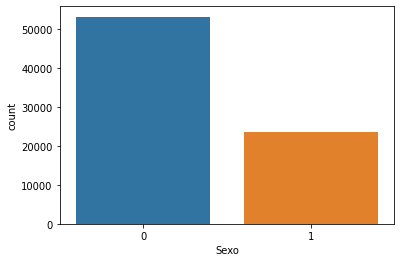

In [30]:
ax = sns.countplot(x="Sexo", data=dataset)

We can also use countplots for categorized quantitative data:

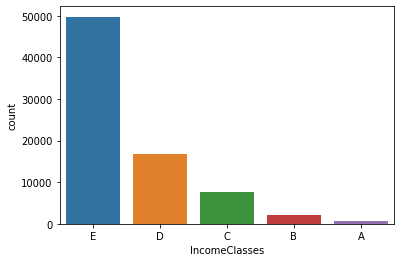

In [31]:
ax = sns.countplot(x="IncomeClasses", data=dataset)

# Central tendency measures

Now, we will study about central tendency metrics. These are:
* Mean: Refers to the average value of a given feature. When we have outliers, the mean may not be a good representation of our population. That occurs because the mean is very sensitive to extreme values. The mean can be evaluated by:

\begin{equation}
\mu = \dfrac{1}{n} \sum_{i=1}^n X_i
\end{equation}

Using Pandas, we can evaluate the mean of a given feature by:

In [32]:
dataset['Renda'].mean( )

2000.3831988547631

Another interesting thing we can do is to evaluated the mean based on a given group. For instance, grouping by sex:

In [33]:
dataset.groupby(['Sexo'])['Renda'].mean()

Sexo
0    2192.441596
1    1566.847393
Name: Renda, dtype: float64

Thus, we can see that the monthly income is higher for men than for women.

* Median: The median divides our series in a half. It is the central value from our feature, when our feature is sorted (ascending or descending order). If we have an even number of observations, we get the two central observations and take their average.

In [34]:
dataset['Renda'].median( )

1200.0

Our median is very different than our mean. That happened because the extreme values are influencing our mean, while they have less influence over the median.

* Mode: Is the most frequent value in our data. If we have multiple modes in our dataset, we say that our feature is bimodal/multimodal.

Mode is used preferrably for qualitative data: 

In [35]:
dataset['IncomeClasses'].mode( )

0    E
Name: IncomeClasses, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In some cases, it can also be used for discrete quantitative data:

In [36]:
dataset['Idade'].mode( )

0    40
dtype: int64

## Relation between the different central tendency measures:

Usually, we can define a feature as having a symmetric or asymmetric distribution.

* Symmetric distribution: All CTM (mean, median, mode) are equal (or very similar).
* Right-skewed assymetric distribution: Mode < Median < Mean
* Left-skewed assymetric distribution: Mode > Median > Mean

Let's see this relation for some of our variables. First, for our monthly income:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


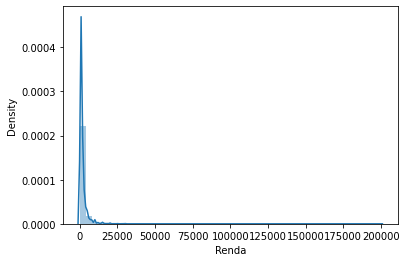

In [37]:
ax = sns.distplot(dataset['Renda'])

We see that this feature is **VERY** right-skewed. To better visualize this, let's remove some outliers:

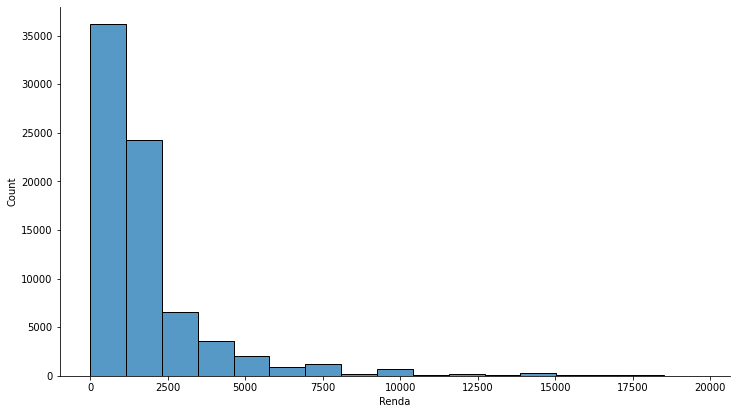

In [38]:
ax = sns.displot(dataset.query('Renda < 20000')['Renda'], bins = k)
ax.figure.set_size_inches(12, 6)

See that most of our entries have a very low monthly income, and very few individuals have a very high income. Now, let's evaluate the CTM:

In [39]:
print(f'Income mean  : {dataset.Renda.mean( )}')
print(f'Income median: {dataset.Renda.median( )}')
print(f'Income mode  : {dataset.Renda.mode( )[0]}')

Income mean  : 2000.3831988547631
Income median: 1200.0
Income mode  : 788


Indeed, we see that Mode < Median < Mean

Now, let's see a similar graph for age:

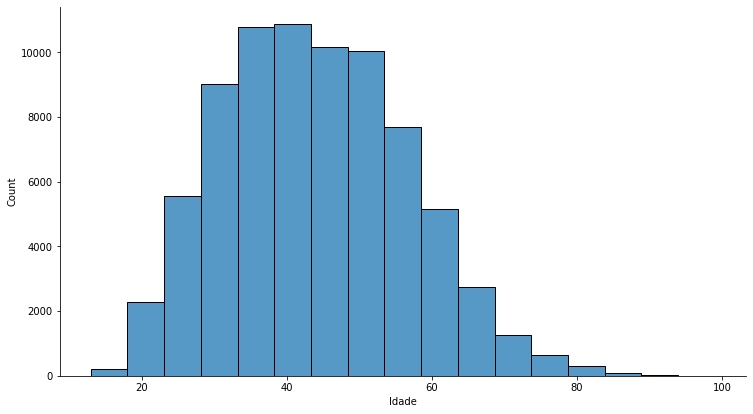

In [40]:
ax = sns.displot(dataset['Idade'], bins = k)
ax.figure.set_size_inches(12, 6)

Again, our graph is right-skewed. However, it is much more symmetric than the previous feature. Let's see the CTMs:

In [41]:
print(f'Age mean  : {dataset.Idade.mean( )}')
print(f'Age median: {dataset.Idade.median( )}')
print(f'Age mode  : {dataset.Idade.mode( )[0]}')

Age mean  : 44.07142113482561
Age median: 43.0
Age mode  : 40


Again, indeed, Mode < Median < Mean. However, this difference is much lower, especially between median and mean.

# Separating measures

Separating measures separe a feature in two parts. The median is actually a separating measure, which separates the feature in two equal parts. Other separating measures are quantiles, deciles, percentiles, and others. 

These measures are interesting because extreme values have a very small influence over them.

For instance, we can use the *quantile()* function to get which value from our feature separates our data in 25%, 50% and 75% of the entries:

In [42]:
dataset.Renda.quantile([0.25, 0.50, 0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

These are also denominated as quartiles. However, we can choose any percentage we want using the quantile function. For instance:

In [43]:
dataset.Renda.quantile(0.116723)

400.0

To get our deciles (10%, 20%, ..., 90%) we can do:

In [44]:
dataset.Renda.quantile([0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90])

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

Or, to simplify the list creation, we can do:

In [45]:
dataset.Renda.quantile([i/10 for i in range(10)])

0.0       0.0
0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

Great! Using this method for list creating, we can also easily found our percentiles, for instance.

In [46]:
dataset.Renda.quantile([i/100 for i in range(100)])

0.00        0.0
0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 100, dtype: float64

Using seaborn, we can make a cumulative frequency distribution using information from our quantiles:

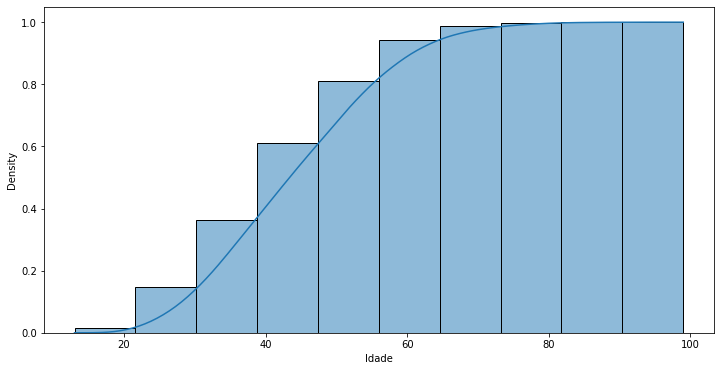

In [47]:
ax = sns.histplot(dataset.Idade, 
                  kde = True,
                  bins = 10,
                  stat = 'density',
                  cumulative = True)

ax.figure.set_size_inches(12,6)

Great! It worked out. Now, we can better visualize our quantiles using a density histogram plot.

Note that we can also evaluate the percentage of entries with less than a given value. For that end, we can do:

In [76]:
from scipy import stats

perc = stats.percentileofscore(dataset.Renda, 788, kind = 'weak')
perc

28.86777719937533

So, in 2015, 28.87% of people made R$ 788.00 or less (in each month).

## Boxplot

A boxplot is a very interesting plot that gives some information about the frequency distribution of a variable, as well as the position of its percentiles.

https://en.wikipedia.org/wiki/Box_plot

A regular boxplot is able to show the first, second and third quartiles (Q1, Q2, and Q3). Also, it helps us to see some candidates for outliers in our data. All entries that are lower than $Q1 - 1.5 \, IQQ$ or higher than $Q3 + 1.5 \, IQQ$ are denoted as dots in the boxplot, showing that they are candidates for outliers, and an analyst should define how to deal with these entries. Here, $IQQ = Q3 - Q1$.

We can create a boxplot using:

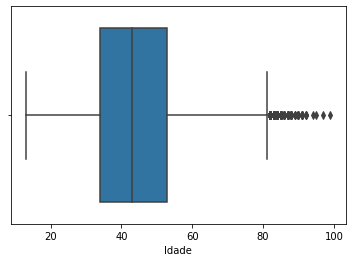

In [48]:
ax = sns.boxplot(x = 'Idade', data = dataset)

We can also use a boxplot to compare different features:

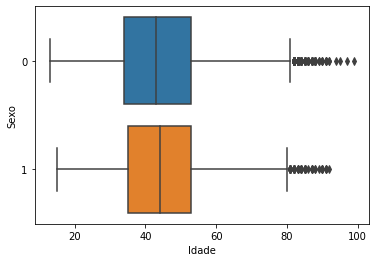

In [51]:
ax = sns.boxplot(x = 'Idade', y = 'Sexo', data = dataset, orient = 'h')

Now, let's create a boxplot for the monthly income:

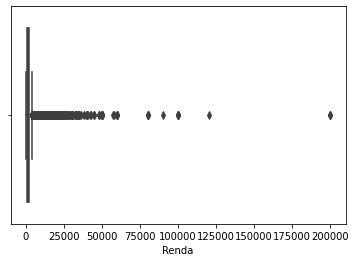

In [52]:
ax = sns.boxplot(x = 'Renda', data = dataset)

Results found for monthly income are very right-skewed. Thus, there are some outliers that make it hard for us to understand our boxplot. When we separate those by sex, we see that there is a difference, but it is still hard for us to see this.

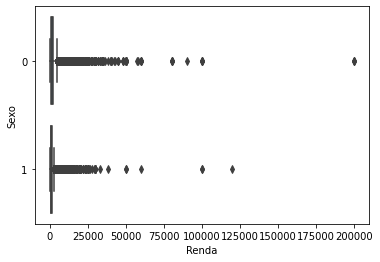

In [53]:
ax = sns.boxplot(x = 'Renda', y = 'Sexo', data = dataset, orient = 'h')

To improve our visualization, we can make a query:

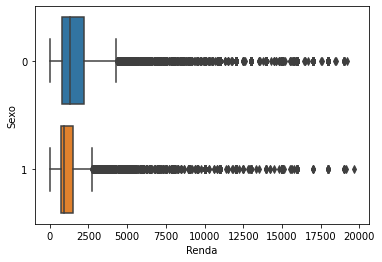

In [54]:
ax = sns.boxplot(x = 'Renda', y = 'Sexo', data = dataset.query('Renda < 20000'), orient = 'h')

Even though our data is still very right-skewed, we can better understand our data. 

Let's do a similar graph, this time using years of study.

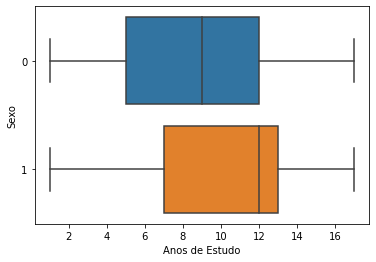

In [57]:
ax = sns.boxplot(x = 'Anos de Estudo', y = 'Sexo', data = dataset, orient = 'h')

Let's analyze how monthly income changes for different states:


[Text(0, 0, 'Rondônia'),
 Text(0, 0, 'Acre'),
 Text(0, 0, 'Amazonas'),
 Text(0, 0, 'Roraima'),
 Text(0, 0, 'Pará'),
 Text(0, 0, 'Amapá'),
 Text(0, 0, 'Tocantins'),
 Text(0, 0, 'Maranhão'),
 Text(0, 0, 'Piauí'),
 Text(0, 0, 'Ceará'),
 Text(0, 0, 'Rio Grande do Norte'),
 Text(0, 0, 'Paraíba'),
 Text(0, 0, 'Pernambuco'),
 Text(0, 0, 'Alagoas'),
 Text(0, 0, 'Sergipe'),
 Text(0, 0, 'Bahia'),
 Text(0, 0, 'Minas Gerais'),
 Text(0, 0, 'Espírito Santo'),
 Text(0, 0, 'Rio de Janeiro'),
 Text(0, 0, 'São Paulo'),
 Text(0, 0, 'Paraná'),
 Text(0, 0, 'Santa Catarina'),
 Text(0, 0, 'Rio Grande do Sul'),
 Text(0, 0, 'Mato Grosso do Sul'),
 Text(0, 0, 'Mato Grosso'),
 Text(0, 0, 'Goiás'),
 Text(0, 0, 'Distrito Federal')]

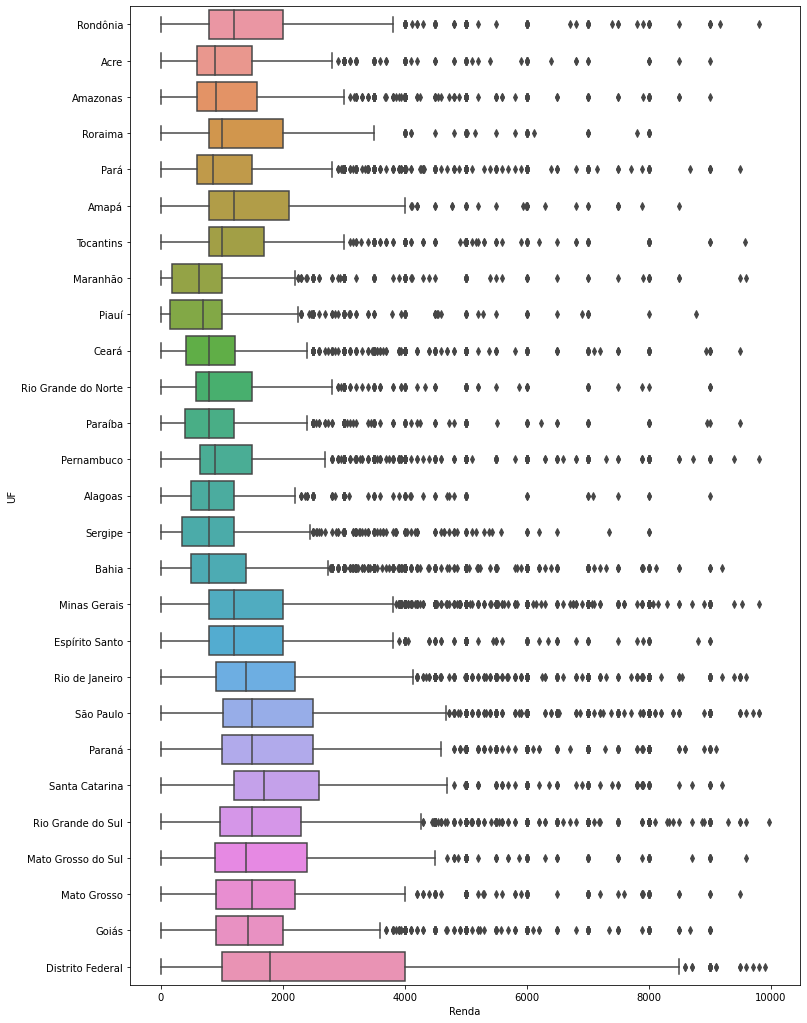

In [85]:
ax = sns.boxplot(x = 'Renda', y = 'UF', data = dataset.query('Renda < 10000'), orient = 'h')

ax.figure.set_size_inches(12,18)

ax.set_yticklabels(list(map_state.values()))

In [79]:
dataset.head( )

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,IncomeClasses
0,11,0,23,8,12,800,1.603808,E
1,11,1,23,2,12,1150,1.739790,E
2,11,1,35,8,15,880,1.760444,E
3,11,0,46,2,6,3500,1.783158,C
4,11,1,47,8,9,150,1.690631,E


We can add another feature to the analysis using different hues:

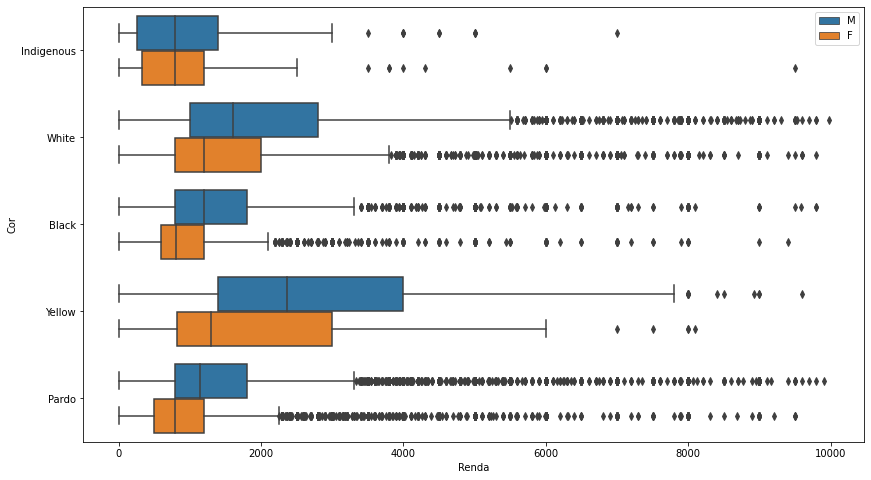

In [74]:
ax = sns.boxplot(x = 'Renda', y = 'Cor', hue = 'Sexo', data = dataset.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(14, 8)

ax.set_yticklabels(list(map_color.values( )))

handles, _ = ax.get_legend_handles_labels( )
ax.legend(handles, ['M', 'F'])

# Dispersion measures

Central tendency and separating measures are able to summarize our data very well. However, using only those measures, it is hard to understand the dispersion of our data.

To get a better knowledge of this, we can use the variance and the standard deviation.

The variance is given by the average of the square distances between each data point and the mean. The standard deviation is given by the square root of the variance, and has the same unit as the mean.

## Variance

To evaluate the variance of a Pandas series, we can simply do:

In [59]:
dataset.Idade.var( )

155.76496363582208

The unit for the variance is the same unit for the mean, squared. Thus, since we have ages in years, this variance is years squared. However, this is very difficult to interpret.


## Standard deviation

The standard deviation is simply the squared root of the variance. Thus, its unit is the same as the mean. To evaluate the standard deviation using Pandas we do:

In [60]:
dataset.Idade.std( )

12.480583465360187